<a href="https://colab.research.google.com/github/Nathalia-Prada/Sinergia_Bootcamp/blob/main/Punto_I_B_Train_Boots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tematicas - Modulo I. Regresion Lineal
Diagrama de arbol
cluster
Boots

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
from google.colab import drive

In [9]:
import matplotlib.pyplot as plt

In [10]:
drive.mount('/content/contentdrive')

Mounted at /content/contentdrive


In [13]:
data_train = pd.read_csv('/content/contentdrive/MyDrive/IA_Data_Mining_2024_Agosto/Datos_curso/Proyecto/Punto_1/train.csv')

In [14]:
data_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [15]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [16]:
print(data_train.columns)

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')


In [18]:
data_train_vf = data_train[['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied']]

In [19]:
data_train_vf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [20]:
data_train_vf.isnull().sum()

,0
trip_duration,0
distance_traveled,0
num_of_passengers,0
fare,0
tip,0
miscellaneous_fees,0
total_fare,0
surge_applied,0


In [21]:
data_train_vf = data_train_vf.dropna()

In [22]:
data_train_vf.isnull().sum()

,0
trip_duration,0
distance_traveled,0
num_of_passengers,0
fare,0
tip,0
miscellaneous_fees,0
total_fare,0
surge_applied,0


In [23]:
data_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


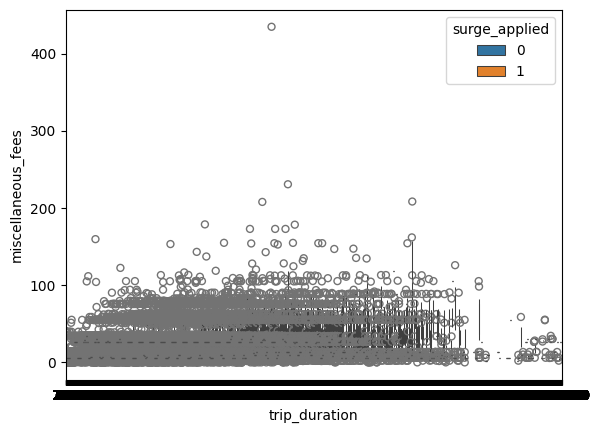

In [27]:
sns.boxenplot(data=data_train_vf,x='trip_duration',y='miscellaneous_fees',hue='surge_applied')
plt.show()

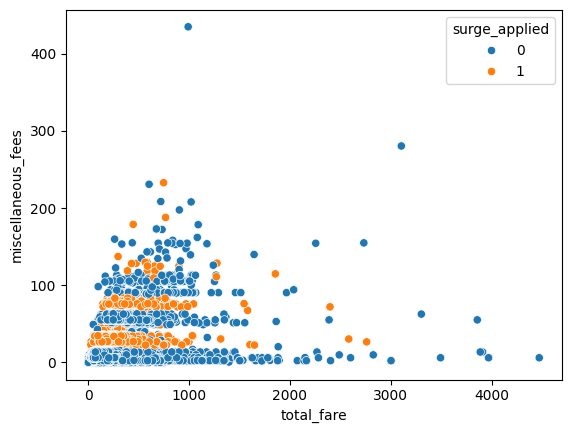

In [34]:
sns.scatterplot(data=data_train_vf,y='miscellaneous_fees',x='total_fare',hue='surge_applied')
plt.show()

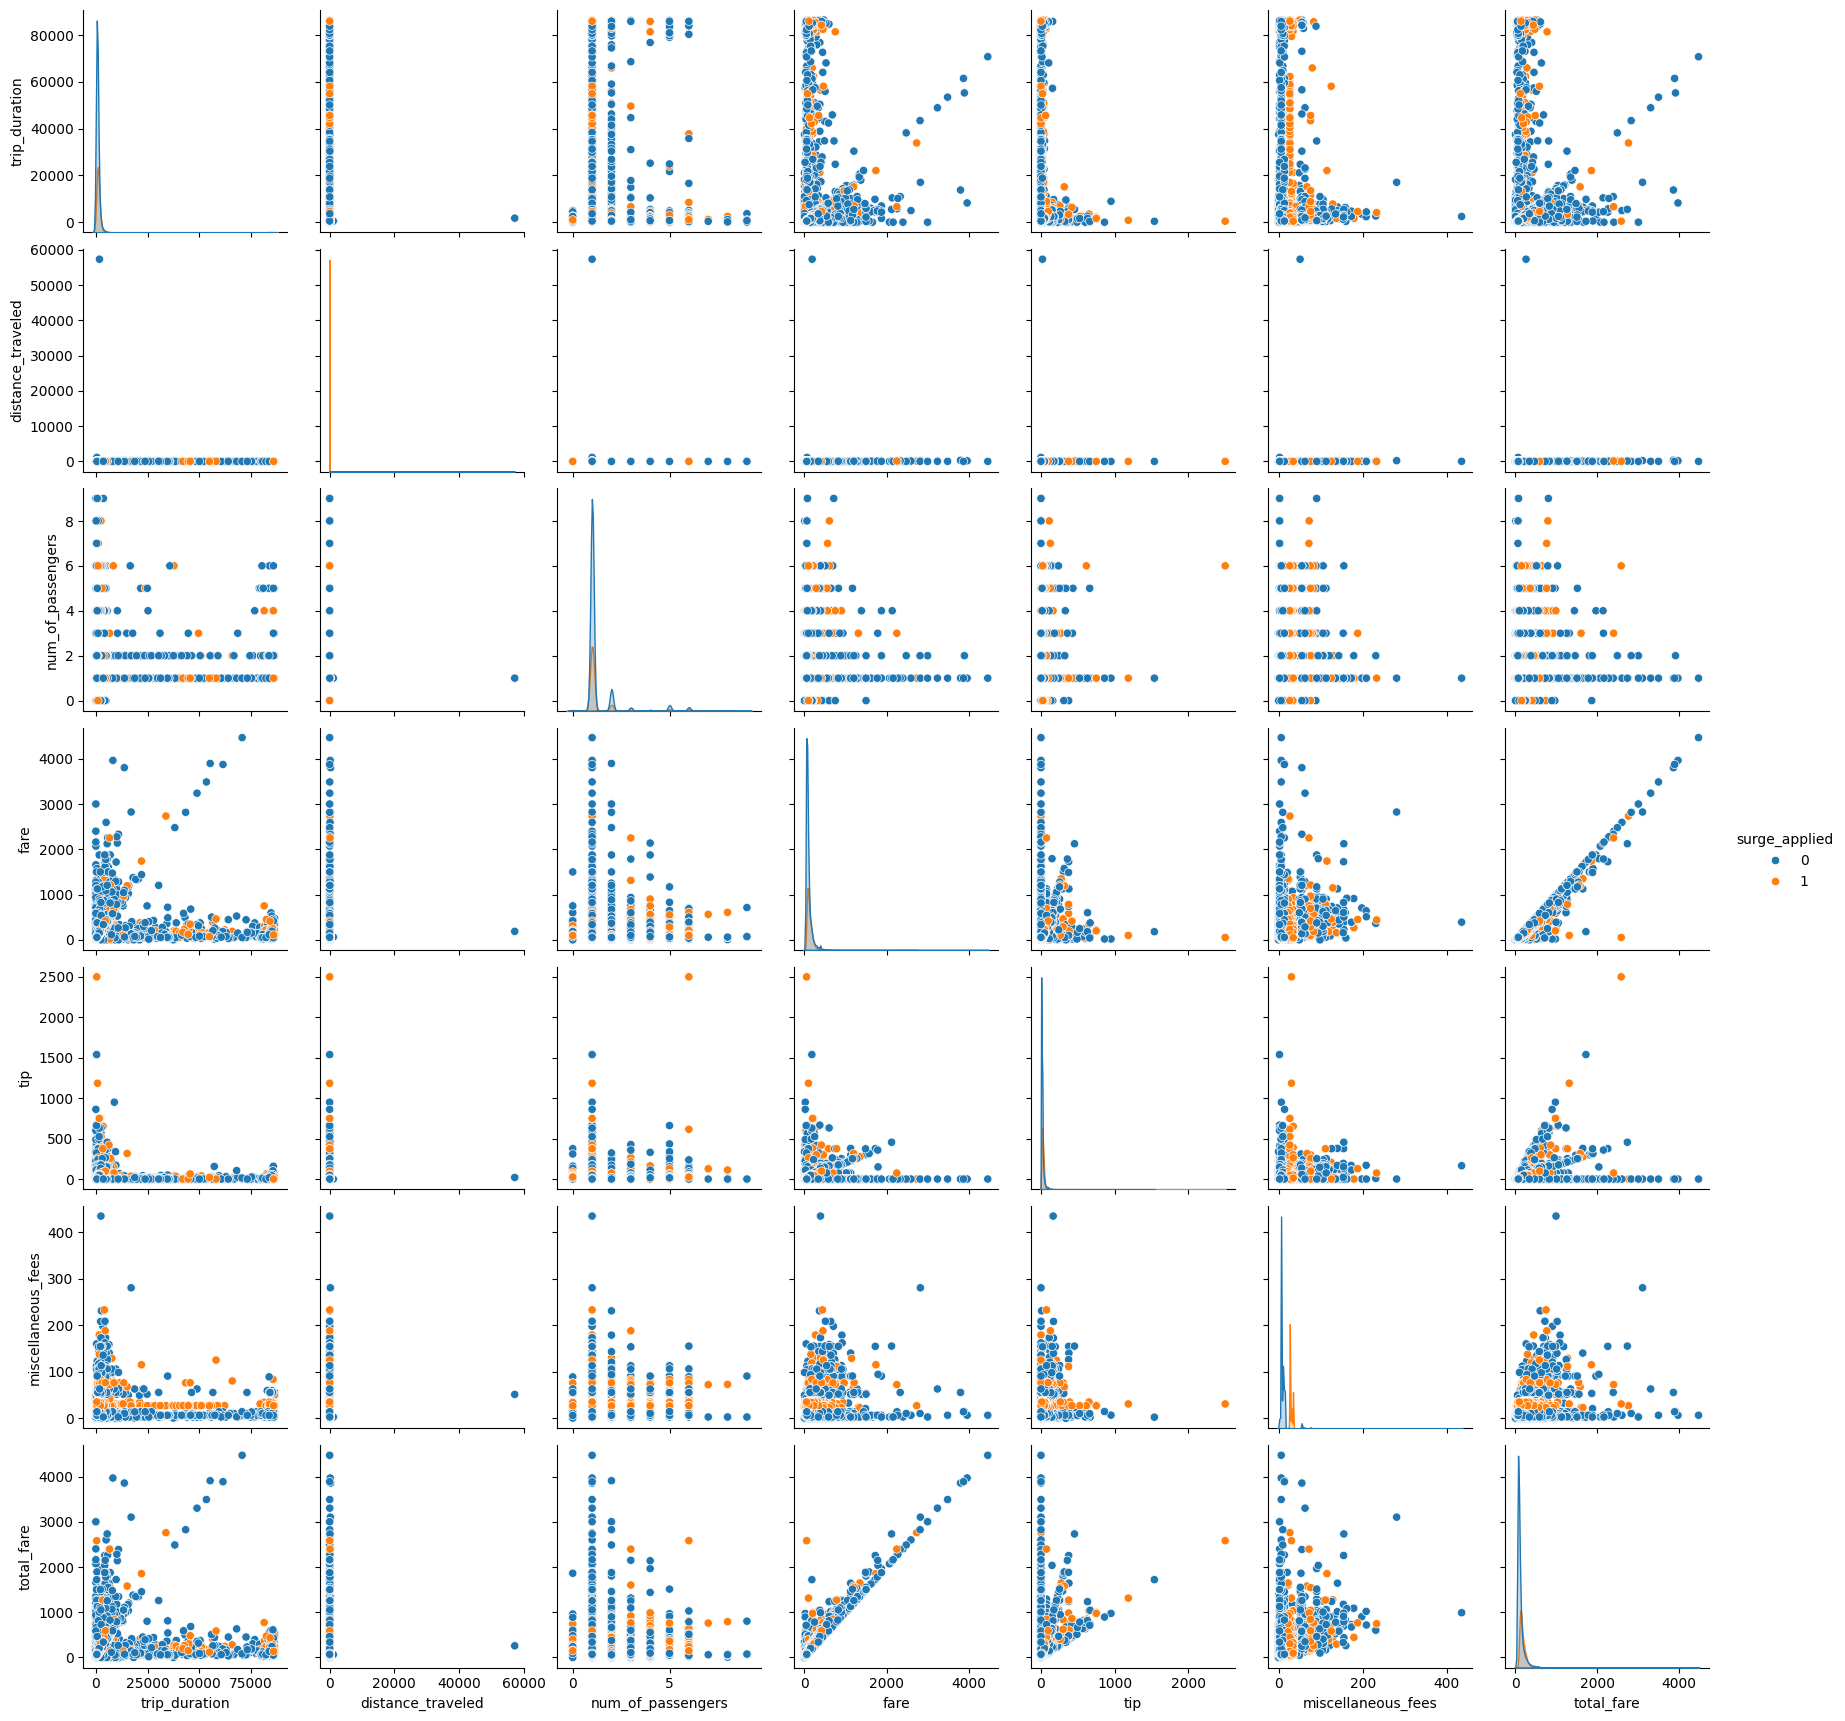

In [35]:
sns.pairplot(data=data_train_vf,hue='surge_applied')
plt.show()

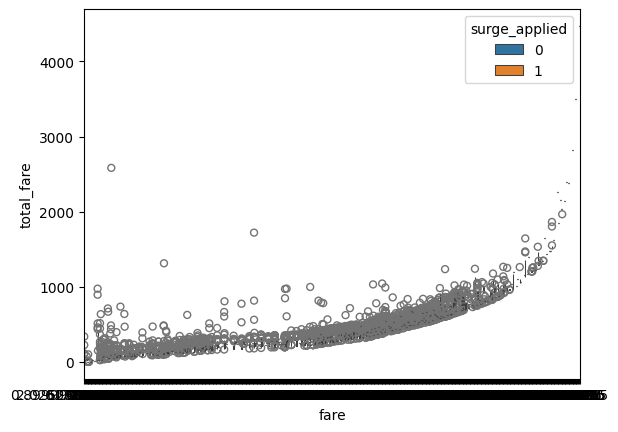

In [36]:
sns.boxenplot(data=data_train_vf,x='fare',y='total_fare',hue='surge_applied')
plt.show()

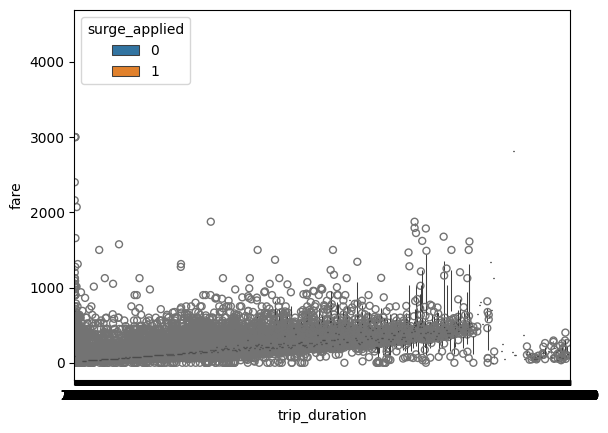

In [37]:
sns.boxenplot(data=data_train_vf,x='trip_duration',y='fare',hue='surge_applied')
plt.show()

In [38]:
X = data_train_vf.drop('surge_applied',axis=1)
y = data_train_vf['surge_applied']

In [39]:
y.value_counts()

,count
surge_applied,
0,150855
1,58818


In [40]:
y.value_counts(normalize=True)

,proportion
surge_applied,
0,0.719477
1,0.280523


In [41]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42,shuffle=True)

In [44]:
y_train.shape

(167738,)

In [45]:
y_test.shape

(41935,)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [48]:
print(X_train_sc)

[[ 2.91744503e-03 -3.68534784e-03  5.05632164e+00 ... -6.36201240e-01
  -1.29463302e-01 -9.30685022e-02]
 [-1.19692086e-01 -6.40014024e-03 -3.14212320e-01 ...  6.31786588e-01
   1.24103760e+00  4.09912071e-02]
 [-1.30838407e-01 -7.82897835e-03 -3.14212320e-01 ...  1.44098962e-01
  -7.11129381e-01 -3.09392124e-01]
 ...
 [-7.72098812e-02 -9.40070027e-03 -3.14212320e-01 ...  2.41636487e-01
  -7.50969523e-01 -2.17987777e-01]
 [-1.30417791e-01 -2.64038737e-02  2.90810805e+00 ... -6.36201240e-01
  -7.27065438e-01 -7.02430817e-01]
 [-1.80050465e-01 -3.08332719e-02 -3.14212320e-01 ... -5.09760886e-02
  -4.58144477e-01 -6.98622303e-01]]


In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
lr = LogisticRegression()

In [51]:
lr.fit(X_train_sc,y_train)

LogisticRegression()

In [52]:
y_pred = lr.predict(X_test_sc)

In [53]:
print(y_pred)

[0 0 0 ... 0 1 0]


In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [55]:
print(accuracy_score(y_test,y_pred))

0.9722427566471921


In [56]:
print(confusion_matrix(y_test,y_pred))

[[29310   928]
 [  236 11461]]


In [57]:
from sklearn.feature_selection import RFE

In [58]:
rfe = RFE(lr,n_features_to_select=4)
rfe.fit(X_train_sc,y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [59]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('trip_duration', False, 3),
 ('distance_traveled', True, 1),
 ('num_of_passengers', False, 4),
 ('fare', True, 1),
 ('tip', False, 2),
 ('miscellaneous_fees', True, 1),
 ('total_fare', True, 1)]

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
arbclass = DecisionTreeClassifier(criterion='entropy',max_depth=4)
arbclass.fit(X_train_sc,y_train)
y_pred2 = arbclass.predict(X_test_sc)

In [62]:
print(accuracy_score(y_test,y_pred2))

0.9988315249791344


In [63]:
print(confusion_matrix(y_test,y_pred2))

[[30214    24]
 [   25 11672]]


In [64]:
arbclass2 = DecisionTreeClassifier(criterion='gini',max_depth=8)
arbclass2.fit(X_train_sc,y_train)
y_pred3 = arbclass2.predict(X_test_sc)

In [65]:
print(accuracy_score(y_test,y_pred3))

0.9991653749850959


In [66]:
print(y_pred2)

[0 0 0 ... 0 1 0]


In [67]:
from sklearn.tree import plot_tree

In [68]:
X_train.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare'],
      dtype='object')

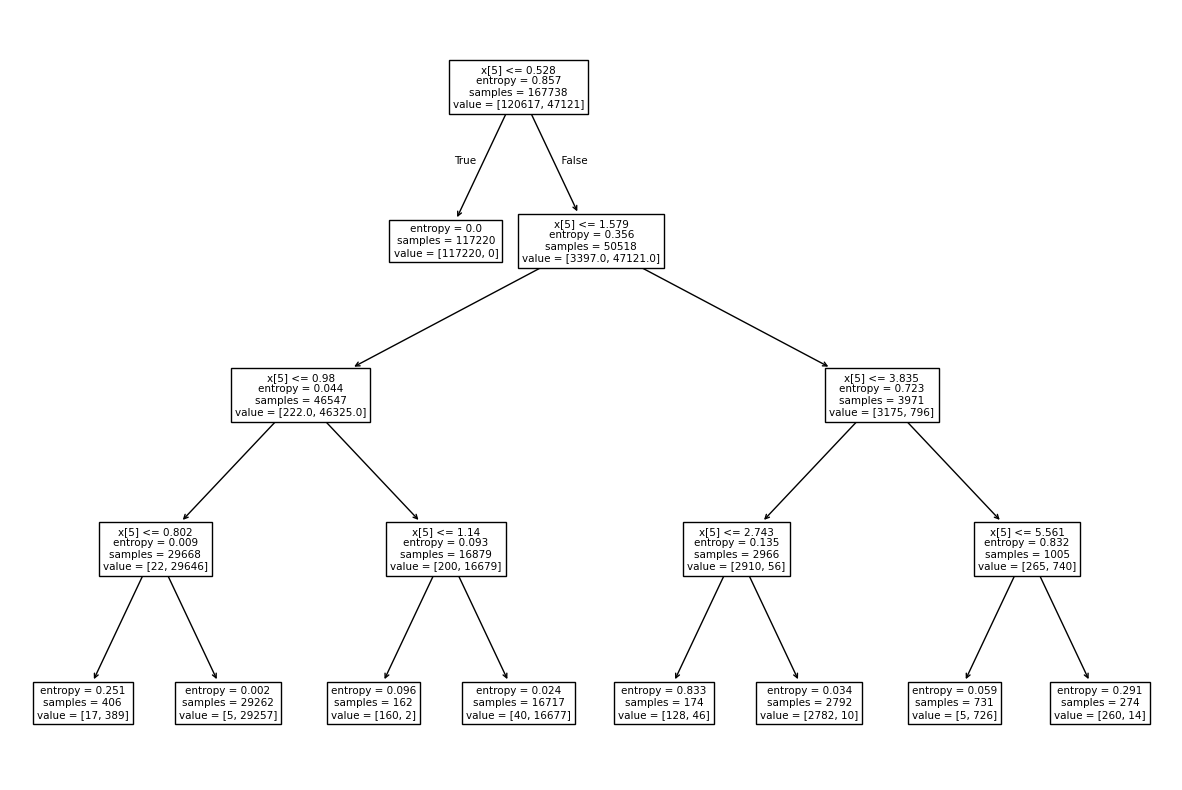

In [69]:
plt.figure(figsize=(15,10))
plot_tree(arbclass)
plt.show()

XGBoostClassifier

In [70]:
from xgboost import XGBClassifier

In [71]:
params ={'objective':'binary:logistic', 'max_depth':4,'learning_rate':0.3,'n_estimators':300}

In [72]:
xgbmodel = XGBClassifier(**params)
xgbmodel.fit(X_train_sc,y_train)
y_pred4 = xgbmodel.predict(X_test_sc)
print(y_pred4)

[0 0 0 ... 0 1 0]


In [73]:
print(accuracy_score(y_test,y_pred4))

0.9977584356742578


In [74]:
print(confusion_matrix(y_test, y_pred))

[[29310   928]
 [  236 11461]]


In [75]:
from sklearn.neighbors import KNeighborsClassifier

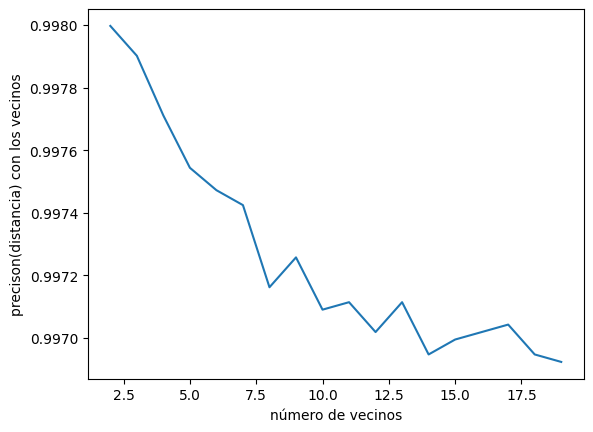

In [76]:
distancia = []
for i in range(2,20):
    knprueba = KNeighborsClassifier(n_neighbors=i)
    knprueba.fit(X_train_sc, y_train)
    distancia.append(knprueba.score(X_test_sc,y_test))

plt.plot(range(2,20),distancia)
plt.xlabel('número de vecinos')
plt.ylabel('precison(distancia) con los vecinos')
plt.show()

In [77]:
knfinal = KNeighborsClassifier(n_neighbors=17)
knfinal.fit(X_train_sc,y_train)
y_pred5 = knfinal.predict(X_test_sc)
print(y_pred5)

[0 0 0 ... 0 1 0]


In [78]:
print(accuracy_score(y_test,y_pred5))

0.9970430428043401


In [79]:
print(confusion_matrix(y_test,y_pred5))

[[30152    86]
 [   38 11659]]


In [80]:
X_train.shape

(167738, 7)

In [81]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [82]:
params = {
    'learning_rate':[0.001,0.1,0.2,0.3],
    'subsample':[0.3,0.6,0.8],
    'n_estimators':[100,200,300]
}

In [83]:
modelohiper = XGBClassifier()

In [84]:
grid_model = GridSearchCV(estimator=modelohiper,param_grid=params,cv=4,scoring='accuracy',verbose=1)

In [85]:
grid_model.fit(X_train_sc, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.001, 0.1, 0.2, 0.3],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.3, 0.6, 0.8]},
             scoring='accuracy', verbose=1)

In [86]:
print(grid_model.best_params_)

{'learning_rate': 0.3, 'n_estimators': 300, 'subsample': 0.8}


In [87]:
print(grid_model.best_score_)

0.9976630233731456


In [88]:
params2 = {
    'learning_rate':[0.002,0.2,0.3,0.4],
    'subsample':[0.2,0.7,0.9],
    'n_estimators':[100,200,300]
}

In [89]:
grid_model2 = GridSearchCV(estimator=modelohiper,param_grid=params2,cv=4,scoring='accuracy',verbose=1)

In [90]:
grid_model2.fit(X_train_sc, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.002, 0.2, 0.3, 0.4],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.7, 0.9]},
             scoring='accuracy', verbose=1)

In [91]:
print(grid_model2.best_params_)

{'learning_rate': 0.4, 'n_estimators': 300, 'subsample': 0.9}


In [92]:
print(grid_model2.best_score_)

0.9977703334409648


In [93]:
print(grid_model2.cv_results_)

{'mean_fit_time': array([2.30389601, 2.33479428, 0.69796157, 1.57721472, 2.37700671,
       2.34251696, 2.10042816, 3.07882595, 3.04776585, 1.22008902,
       1.81667525, 1.05226648, 2.95087236, 3.07348758, 2.53310764,
       4.67198098, 4.37131864, 3.97422922, 0.98780572, 2.0782513 ,
       1.16027552, 3.01166117, 3.00724006, 2.8444007 , 4.08778578,
       4.81625122, 4.05423069, 1.89625913, 1.10323131, 0.97204763,
       3.17938566, 2.81920618, 3.00703186, 3.95590514, 4.04746491,
       3.81422216]), 'std_fit_time': array([0.67757218, 1.2262218 , 0.0347904 , 0.37561717, 1.28911121,
       1.82742682, 0.43768367, 1.47426345, 1.92140075, 0.3542895 ,
       0.91405073, 0.2167912 , 1.64883591, 1.41556196, 0.85651478,
       1.84737484, 1.27325543, 1.81300932, 0.01130291, 1.80281393,
       0.27998759, 1.40787431, 1.76735209, 1.25132472, 1.36974948,
       2.84255644, 1.84275632, 0.88636   , 0.13660509, 0.01531869,
       1.75196001, 1.50111739, 1.4987945 , 1.57212313, 1.66335152,
       

In [94]:
rand_model = RandomizedSearchCV(estimator=modelohiper, param_distributions=params, cv=4, scoring='accuracy',verbose=1)

In [95]:
rand_model.fit(X_train_sc,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   param_distributions={'learning_rate': [0.001, 0.1, 0.2, 0.3],
                                        'n_estimators': [100, 200, 300],
                                        'subsample': [0.3, 0.6, 0.8]},
                   scoring='accuracy', verbose=1)

In [96]:
print(rand_model.best_params_)

{'subsample': 0.6, 'n_estimators': 300, 'learning_rate': 0.2}


In [97]:
print(rand_model.best_score_)

0.9976570609128976


Redes Neuronales

In [105]:
import tensorflow as tf
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import SimpleRNN, Dense, LSTM, GRU
from sklearn.preprocessing import MinMaxScaler

In [106]:
from keras import models

In [107]:
model = models.Sequential([
    keras.layers.Dense(80, activation='relu',input_shape=X_train_sc.shape[1:]),
    keras.layers.Dense(160,activation='relu'),
    keras.layers.Dense(60,activation='relu'),
    keras.layers.Dense(12,activation='relu'),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [108]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mae'])

In [110]:
historia = model.fit(X_train_sc,y_train,epochs=18)

Epoch 1/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - loss: 0.0019 - mae: 0.0063
Epoch 2/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - loss: 0.0019 - mae: 0.0060
Epoch 3/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0018 - mae: 0.0061
Epoch 4/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - loss: 0.0020 - mae: 0.0063
Epoch 5/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - loss: 0.0017 - mae: 0.0054
Epoch 6/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0015 - mae: 0.0052
Epoch 7/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0018 - mae: 0.0056
Epoch 8/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0016 - mae: 0.0055
Epoch 9/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0018 - mae: 0.0065
Epoch 10/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.0016 - mae: 0.0056
Epoch 11/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.0015 - mae: 0.0052
Epoch 12/18
5242/5242 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - loss: 0.0013 - m

In [111]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 160)                 │          12,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 60)                  │           9,660 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 12)                  │             732 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              13 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 72,017 (281.32 KB)

 Trainable params: 24,005 (93.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 48,012 (187.55 KB)

In [ ]:
model.evaluate(X_test_sc,y_test)

In [112]:
y_predf = model.predict(X_test_sc)

1311/1311 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


In [117]:
y_predfinal = y_predf.reshape(-1)

In [114]:
data_train.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [119]:
df_info_final = pd.DataFrame({'real':y_test,'predicciones_tf':y_predfinal,'total_fare':X_test['total_fare'],'fare':X_test['trip_duration']})

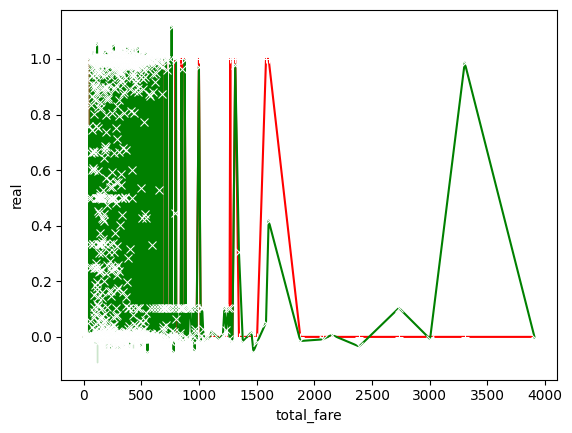

In [120]:
sns.lineplot(data=df_info_final, x='total_fare', y='real', marker='+',c='r')
sns.lineplot(data=df_info_final, x='total_fare', y='predicciones_tf', marker='x',c='g')
plt.show()

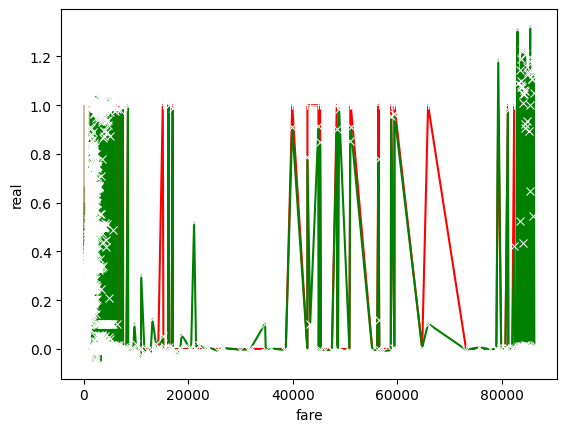

In [124]:
sns.lineplot(data=df_info_final, x='fare', y='real', marker='+',c='r')
sns.lineplot(data=df_info_final, x='fare', y='predicciones_tf', marker='x',c='g')
plt.show()